In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score

from imblearn.over_sampling import SMOTE, RandomOverSampler

In [2]:

data = pd.read_csv("F:\GUVI\Project\FINAL PROJECT\Final_cleaned_data.csv")

<>:1: SyntaxWarning: invalid escape sequence '\G'
<>:1: SyntaxWarning: invalid escape sequence '\G'
C:\Users\syeda\AppData\Local\Temp\ipykernel_6572\2751022775.py:1: SyntaxWarning: invalid escape sequence '\G'
  data = pd.read_csv("F:\GUVI\Project\FINAL PROJECT\Final_cleaned_data.csv")


In [3]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [4]:
data.head()

,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_INCOME_TYPE,FLAG_MOBIL,FLAG_CONT_MOBILE,FLAG_EMAIL,OCCUPATION_TYPE,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,FLAG_LAST_APPL_PER_CONTRACT,NAME_CONTRACT_STATUS,NFLAG_INSURED_ON_APPROVAL,DAYS_BIRTH_YEARS,DAYS_EMPLOYED_YEARS,DAYS_REGISTRATION_YEARS,DAYS_ID_PUBLISH_YEARS,DAYS_LAST_PHONE_CHANGE_YEARS,DAYS_DECISION_YEARS
0,1,Cash loans,M,202500.0,406597.5,24700.5,351000.0,Working,1,1,0,Laborers,Business Entity Type 3,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,9251.775,179055.0,179055.0,179055.0,Y,Approved,0.0,25.9,1.7,10.0,5.8,3.1,1.7
1,0,Cash loans,F,270000.0,1293502.5,35698.5,1129500.0,State servant,1,1,0,Core staff,School,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,98356.995,900000.0,1035882.0,900000.0,Y,Approved,1.0,45.9,3.3,3.2,0.8,2.3,2.0
2,0,Cash loans,F,270000.0,1293502.5,35698.5,1129500.0,State servant,1,1,0,Core staff,School,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64567.665,337500.0,348637.5,337500.0,Y,Approved,0.0,45.9,3.3,3.2,0.8,2.3,2.3
3,0,Cash loans,F,270000.0,1293502.5,35698.5,1129500.0,State servant,1,1,0,Core staff,School,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6737.310,68809.5,68053.5,68809.5,Y,Approved,1.0,45.9,3.3,3.2,0.8,2.3,6.4
4,0,Revolving loans,M,67500.0,135000.0,6750.0,135000.0,Working,1,1,0,Laborers,Government,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5357.250,24282.0,20106.0,24282.0,Y,Approved,0.0,52.1,0.6,11.7,6.9,2.2,2.2


In [5]:
data.shape

(1303167, 36)

In [6]:
data.duplicated().sum()

0

In [7]:
data.drop("ORGANIZATION_TYPE", axis=1, inplace=True)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303167 entries, 0 to 1303166
Data columns (total 35 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   TARGET                        1303167 non-null  int64  
 1   NAME_CONTRACT_TYPE_x          1303167 non-null  object 
 2   CODE_GENDER                   1303167 non-null  object 
 3   AMT_INCOME_TOTAL              1303167 non-null  float64
 4   AMT_CREDIT_x                  1303167 non-null  float64
 5   AMT_ANNUITY_x                 1303167 non-null  float64
 6   AMT_GOODS_PRICE_x             1303167 non-null  float64
 7   NAME_INCOME_TYPE              1303167 non-null  object 
 8   FLAG_MOBIL                    1303167 non-null  int64  
 9   FLAG_CONT_MOBILE              1303167 non-null  int64  
 10  FLAG_EMAIL                    1303167 non-null  int64  
 11  OCCUPATION_TYPE               1303167 non-null  object 
 12  OBS_30_CNT_SOCIAL_CIRCLE    

In [9]:
le = LabelEncoder()
for i in data.select_dtypes(include='object'):
    data[i] = le.fit_transform(data[i])

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
data_corr = data.corr()

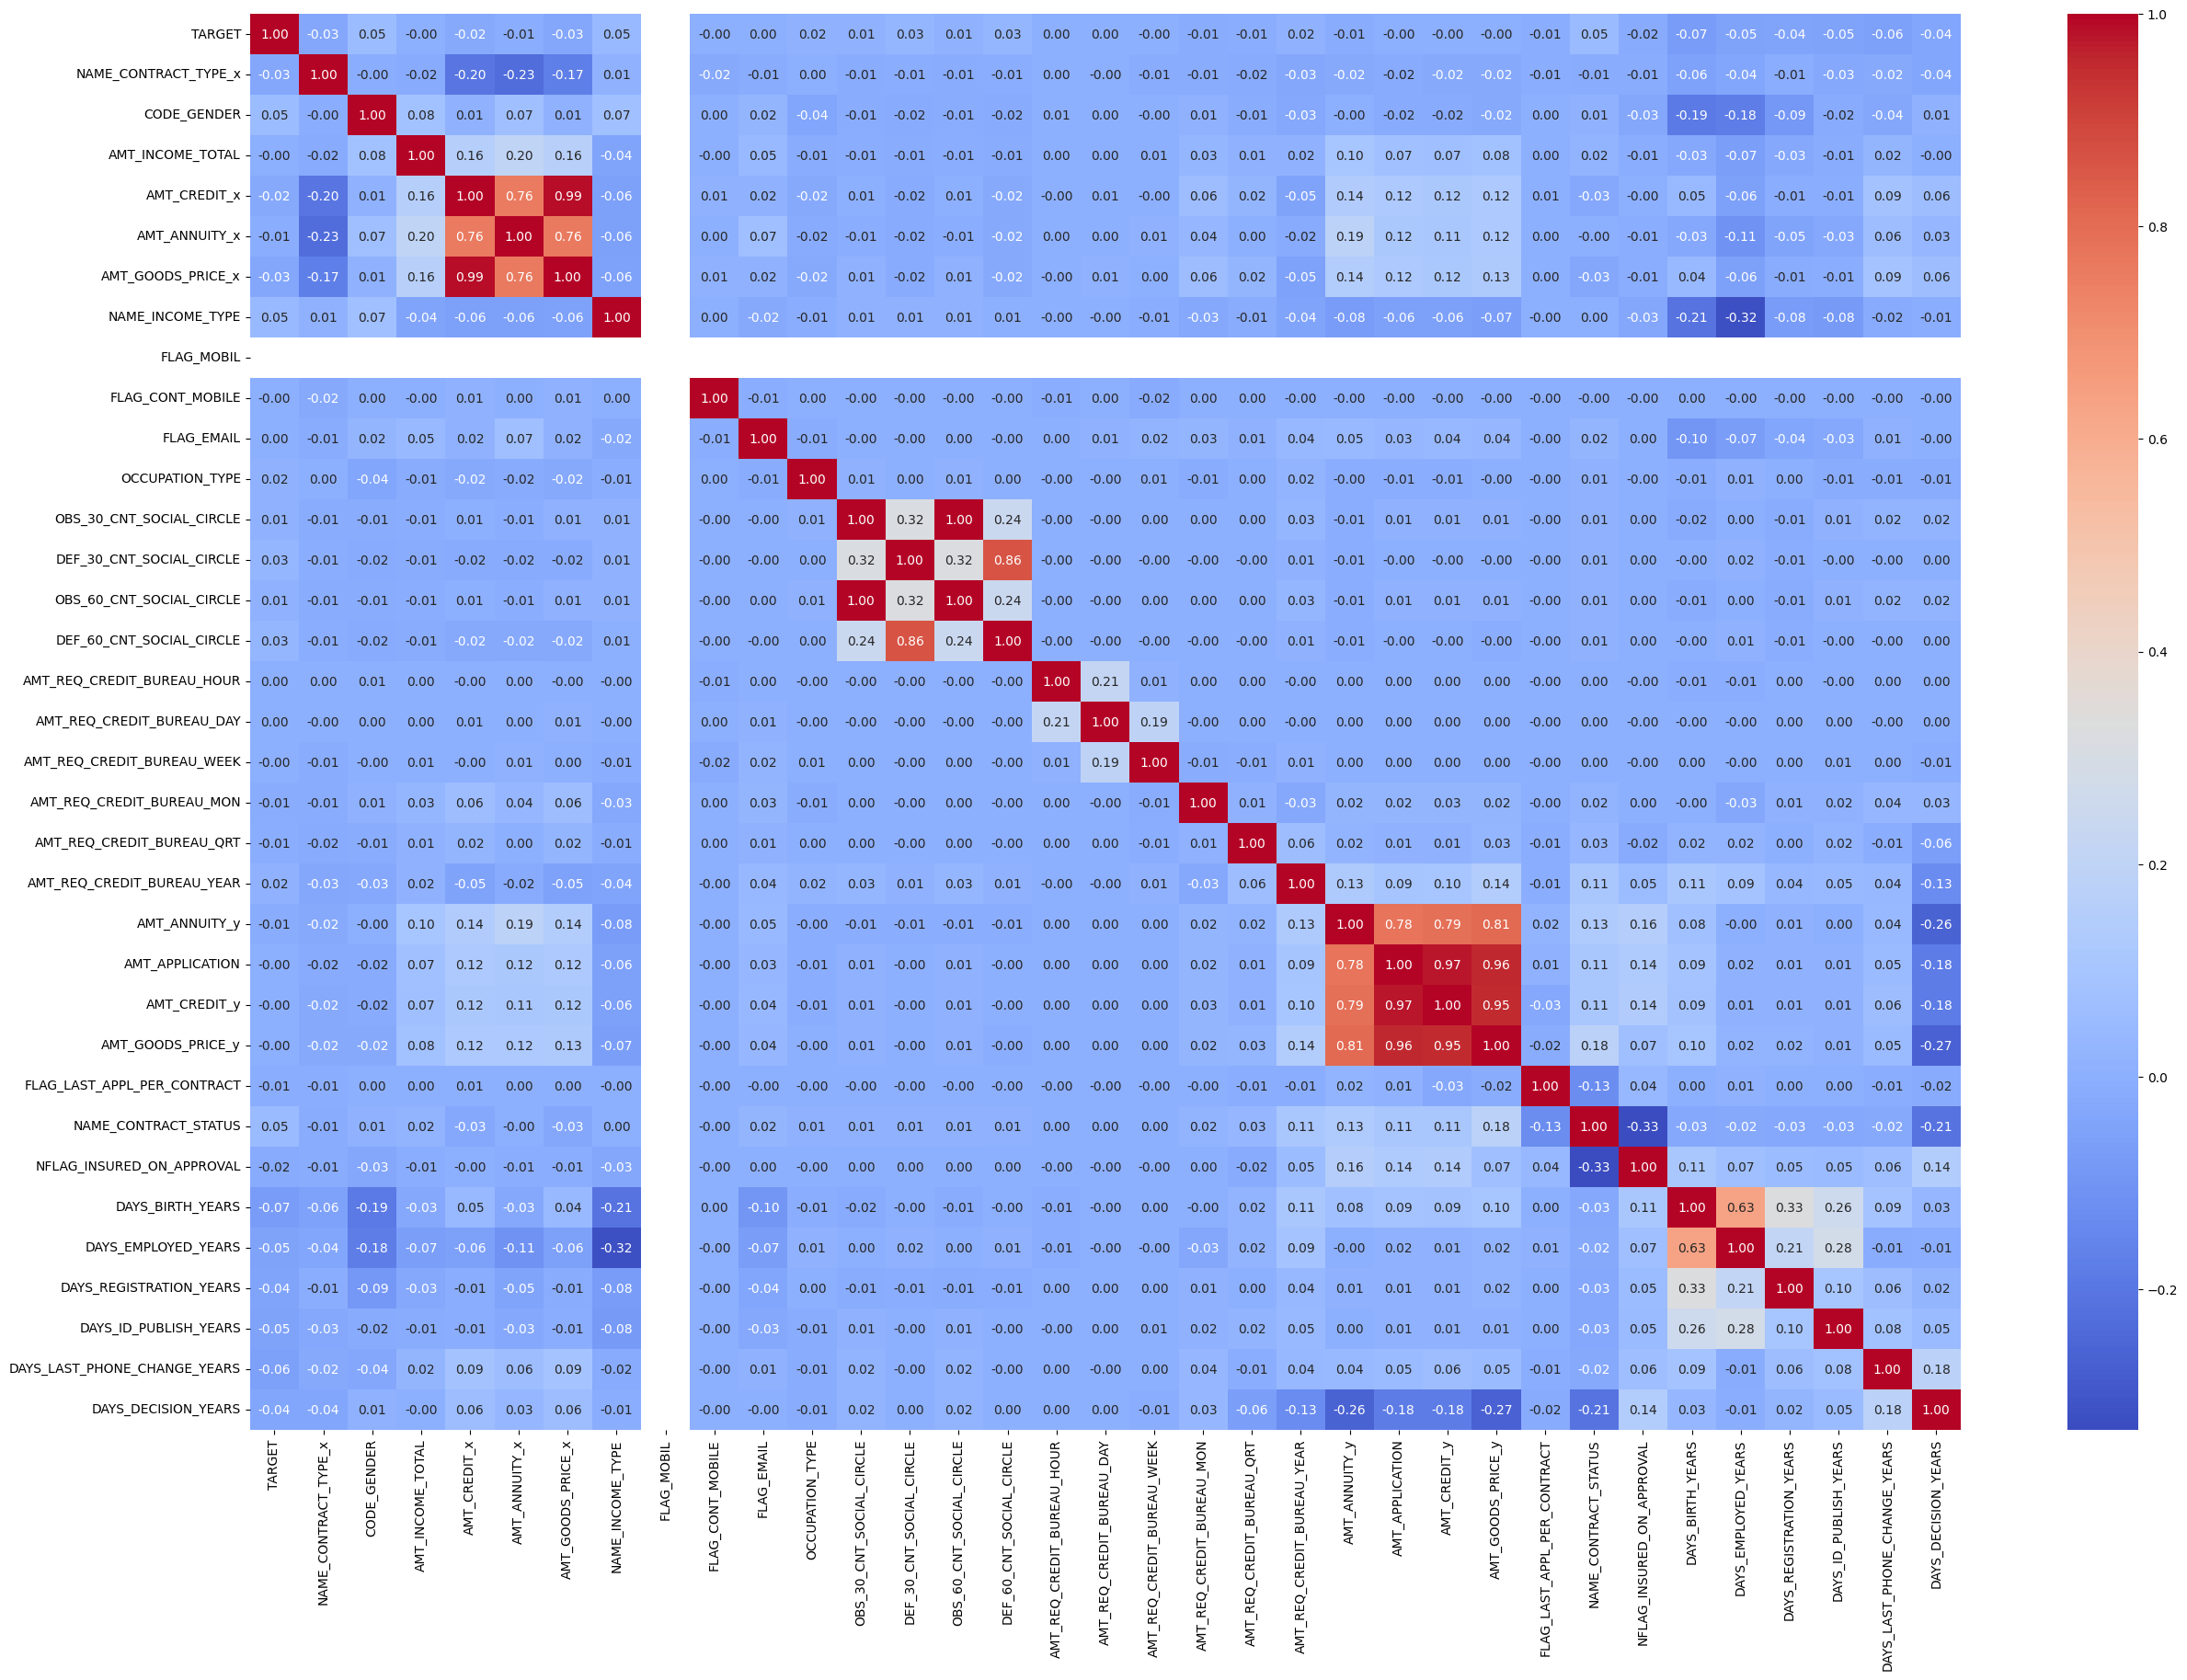

In [12]:
plt.figure(figsize=(30, 20))
sns.heatmap(data=data_corr,annot=True, fmt=".2f", cmap="coolwarm")
plt.show()

In [13]:
data.columns

Index(['TARGET', 'NAME_CONTRACT_TYPE_x', 'CODE_GENDER', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT_x', 'AMT_ANNUITY_x', 'AMT_GOODS_PRICE_x',
       'NAME_INCOME_TYPE', 'FLAG_MOBIL', 'FLAG_CONT_MOBILE', 'FLAG_EMAIL',
       'OCCUPATION_TYPE', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'AMT_ANNUITY_y', 'AMT_APPLICATION',
       'AMT_CREDIT_y', 'AMT_GOODS_PRICE_y', 'FLAG_LAST_APPL_PER_CONTRACT',
       'NAME_CONTRACT_STATUS', 'NFLAG_INSURED_ON_APPROVAL', 'DAYS_BIRTH_YEARS',
       'DAYS_EMPLOYED_YEARS', 'DAYS_REGISTRATION_YEARS',
       'DAYS_ID_PUBLISH_YEARS', 'DAYS_LAST_PHONE_CHANGE_YEARS',
       'DAYS_DECISION_YEARS'],
      dtype='object')

In [14]:
corr_cols = ['AMT_GOODS_PRICE_x','OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','AMT_APPLICATION','AMT_CREDIT_y', 'AMT_GOODS_PRICE_y','DAYS_EMPLOYED_YEARS']

In [15]:
data.drop(corr_cols, axis=1, inplace=True)

In [16]:
data.shape

(1303167, 28)

In [17]:
data.head()

,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,NAME_INCOME_TYPE,FLAG_MOBIL,FLAG_CONT_MOBILE,FLAG_EMAIL,OCCUPATION_TYPE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_ANNUITY_y,FLAG_LAST_APPL_PER_CONTRACT,NAME_CONTRACT_STATUS,NFLAG_INSURED_ON_APPROVAL,DAYS_BIRTH_YEARS,DAYS_REGISTRATION_YEARS,DAYS_ID_PUBLISH_YEARS,DAYS_LAST_PHONE_CHANGE_YEARS,DAYS_DECISION_YEARS
0,1,0,1,202500.0,406597.5,24700.5,6,1,1,0,8,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,9251.775,1,0,0.0,25.9,10.0,5.8,3.1,1.7
1,0,0,0,270000.0,1293502.5,35698.5,3,1,1,0,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,98356.995,1,0,1.0,45.9,3.2,0.8,2.3,2.0
2,0,0,0,270000.0,1293502.5,35698.5,3,1,1,0,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64567.665,1,0,0.0,45.9,3.2,0.8,2.3,2.3
3,0,0,0,270000.0,1293502.5,35698.5,3,1,1,0,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6737.310,1,0,1.0,45.9,3.2,0.8,2.3,6.4
4,0,1,1,67500.0,135000.0,6750.0,6,1,1,0,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5357.250,1,0,0.0,52.1,11.7,6.9,2.2,2.2


In [18]:
features_cols = ["AMT_INCOME_TOTAL", "AMT_CREDIT_x", "AMT_ANNUITY_x","AMT_ANNUITY_y"]

In [19]:
mm = MinMaxScaler()
data[features_cols] = mm.fit_transform(data[features_cols])

In [20]:
data.head()

,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,NAME_INCOME_TYPE,FLAG_MOBIL,FLAG_CONT_MOBILE,FLAG_EMAIL,OCCUPATION_TYPE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_ANNUITY_y,FLAG_LAST_APPL_PER_CONTRACT,NAME_CONTRACT_STATUS,NFLAG_INSURED_ON_APPROVAL,DAYS_BIRTH_YEARS,DAYS_REGISTRATION_YEARS,DAYS_ID_PUBLISH_YEARS,DAYS_LAST_PHONE_CHANGE_YEARS,DAYS_DECISION_YEARS
0,1,0,1,0.001512,0.090287,0.103342,6,1,1,0,8,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.022130,1,0,0.0,25.9,10.0,5.8,3.1,1.7
1,0,0,0,0.002089,0.311736,0.152575,3,1,1,0,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.235271,1,0,1.0,45.9,3.2,0.8,2.3,2.0
2,0,0,0,0.002089,0.311736,0.152575,3,1,1,0,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.154447,1,0,0.0,45.9,3.2,0.8,2.3,2.3
3,0,0,0,0.002089,0.311736,0.152575,3,1,1,0,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.016116,1,0,1.0,45.9,3.2,0.8,2.3,6.4
4,0,1,1,0.000358,0.022472,0.022985,6,1,1,0,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.012815,1,0,0.0,52.1,11.7,6.9,2.2,2.2


In [44]:
data["DAYS_DECISION_YEARS"].value_counts()

DAYS_DECISION_YEARS
0.7    52781
0.6    51918
0.8    50004
0.5    47899
0.9    45195
1.0    44058
0.4    40815
1.1    37346
1.2    32629
1.3    32246
0.3    31810
1.4    29872
1.5    27732
0.1    27072
1.7    26012
1.6    25234
1.9    24418
1.8    24200
2.0    24133
0.2    22338
2.1    22284
2.2    20458
2.3    20209
2.4    17778
2.5    17034
0.0    16674
2.6    15752
2.7    15600
3.0    15127
2.9    14764
2.8    14502
3.1    13039
3.2    12546
3.3    11379
3.4    11004
4.1    10573
3.5    10385
4.0    10316
4.2    10311
3.6    10258
3.7    10113
3.8     9884
3.9     9706
4.3     9321
6.7     9281
7.0     9277
6.9     9182
6.8     8928
4.4     8826
7.1     8772
7.2     8398
6.5     8334
6.6     8257
6.3     8194
6.4     8016
6.1     7983
6.2     7882
4.7     7829
4.6     7799
7.3     7668
4.8     7623
4.5     7611
6.0     7545
5.9     7499
5.0     7401
5.1     7224
7.4     7165
4.9     7118
5.3     7074
5.2     6934
5.7     6818
5.8     6816
5.6     6671
5.5     6608
5.4     6560
7.5  

In [21]:
data.duplicated().sum()

2444

In [22]:
data.drop_duplicates(inplace=True)

In [23]:
uw_cols = ["FLAG_CONT_MOBILE", "AMT_REQ_CREDIT_BUREAU_HOUR", "AMT_REQ_CREDIT_BUREAU_DAY", "AMT_REQ_CREDIT_BUREAU_WEEK", "AMT_REQ_CREDIT_BUREAU_QRT", "DAYS_REGISTRATION_YEARS"]

In [24]:
data.drop(uw_cols, axis=1, inplace=True)

In [25]:
val = data.drop("TARGET", axis=1)
tar = data["TARGET"]

In [26]:
tar.value_counts()

TARGET
0    1190252
1     110471
Name: count, dtype: int64

In [27]:
data.duplicated().sum()

0

In [28]:
os = SMOTE(random_state=76)
os_val, os_tar = os.fit_resample(val, tar)

In [29]:
os_tar.value_counts()

TARGET
1    1190252
0    1190252
Name: count, dtype: int64

In [30]:
train_data, test_data, train_lab, test_lab = train_test_split(os_val, os_tar, test_size=0.20, random_state=74)

In [31]:
def get_perform(actual, predict):
    acc_score = accuracy_score(actual, predict)
    prec_score = precision_score(actual, predict,average='macro')
    rec_score = recall_score(actual, predict,average='macro')
    f1 = f1_score(actual, predict, average='macro')
    return pd.DataFrame({
        "accuracy_score":[acc_score],
        "precision_score":[prec_score],
        "recall_score": [rec_score],
        "f1_score":[f1]
    })

In [32]:
# XGBClassifier

xgbc = XGBClassifier(learning_rate=0.4, n_estimators=200, max_depth=10, random_state=67)
xgbc.fit(train_data, train_lab)
xgbc_train_pred = xgbc.predict(train_data)
xgbc_test_pred = xgbc.predict(test_data)

In [33]:
get_perform(train_lab, xgbc_train_pred)

,accuracy_score,precision_score,recall_score,f1_score
0,0.975238,0.97616,0.975236,0.975226


In [34]:
get_perform(test_lab, xgbc_test_pred)

,accuracy_score,precision_score,recall_score,f1_score
0,0.967083,0.968482,0.967093,0.967059


In [35]:
# Extract feature importances
xgbc_feature_importances = xgbc.feature_importances_

In [36]:
# Create a DataFrame for better visualization
features = pd.DataFrame({
    'Feature': os_val.columns,  # Replace with your actual feature names
    'Importance': xgbc_feature_importances
}).sort_values(by='Importance', ascending=False)

In [37]:
features

,Feature,Importance
16,NFLAG_INSURED_ON_APPROVAL,0.386831
20,DAYS_DECISION_YEARS,0.175290
15,NAME_CONTRACT_STATUS,0.072752
0,NAME_CONTRACT_TYPE_x,0.067951
10,DEF_60_CNT_SOCIAL_CIRCLE,0.041485
11,AMT_REQ_CREDIT_BUREAU_MON,0.035441
12,AMT_REQ_CREDIT_BUREAU_YEAR,0.031200
2,AMT_INCOME_TOTAL,0.023418
13,AMT_ANNUITY_y,0.021523
9,OBS_60_CNT_SOCIAL_CIRCLE,0.016875


In [38]:
# GradientBoostingClassifier

gbc = GradientBoostingClassifier(learning_rate=0.4, n_estimators=200, max_depth=10, random_state=67)
gbc.fit(train_data, train_lab)
gbc_train_pred = gbc.predict(train_data)
gbc_test_pred = gbc.predict(test_data)

In [39]:
get_perform(train_lab, gbc_train_pred)

,accuracy_score,precision_score,recall_score,f1_score
0,0.981163,0.981704,0.981161,0.981157


In [40]:
get_perform(test_lab, gbc_test_pred)

,accuracy_score,precision_score,recall_score,f1_score
0,0.967933,0.969136,0.967943,0.967913


In [41]:
# Extract feature importances
gbc_feature_importances = gbc.feature_importances_

In [42]:
# Create a DataFrame for better visualization
features = pd.DataFrame({
    'Feature': os_val.columns,  # Replace with your actual feature names
    'Importance': gbc_feature_importances
}).sort_values(by='Importance', ascending=False)

In [43]:
features

,Feature,Importance
20,DAYS_DECISION_YEARS,0.315816
16,NFLAG_INSURED_ON_APPROVAL,0.168368
12,AMT_REQ_CREDIT_BUREAU_YEAR,0.071734
3,AMT_CREDIT_x,0.053886
17,DAYS_BIRTH_YEARS,0.049151
13,AMT_ANNUITY_y,0.047940
19,DAYS_LAST_PHONE_CHANGE_YEARS,0.042254
4,AMT_ANNUITY_x,0.038655
15,NAME_CONTRACT_STATUS,0.033612
2,AMT_INCOME_TOTAL,0.033262
